<a href="https://colab.research.google.com/github/svetlanama/-numerical_programming/blob/main/Eigen_Values_and_vectors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://pythonnumericalmethods.studentorg.berkeley.edu/notebooks/chapter15.04-Eigenvalues-and-Eigenvectors-in-Python.html

In [34]:
# QR algo
import numpy as np
from numpy.linalg import qr

a = np.array([[0, 2],
              [2, 3]])
p = [1, 5, 10, 20]
for i in range(20):
    q, r = qr(a)
    a = np.dot(r, q)
    if i+1 in p:
        print(f'Iteration {i+1}:')
        print(a)

Iteration 1:
[[3. 2.]
 [2. 0.]]
Iteration 5:
[[ 3.99998093  0.00976559]
 [ 0.00976559 -0.99998093]]
Iteration 10:
[[ 4.00000000e+00  9.53674316e-06]
 [ 9.53674316e-06 -1.00000000e+00]]
Iteration 20:
[[ 4.00000000e+00  9.09484250e-12]
 [ 9.09494702e-12 -1.00000000e+00]]


In [35]:
import numpy as np
from numpy.linalg import qr

# Ваша матриця
A = np.array([[0, 2],
              [2, 3]], dtype=float)

print("="*60)
print("QR АЛГОРИТМ ДЛЯ ЗНАХОДЖЕННЯ ВЛАСНИХ ЗНАЧЕНЬ")
print("="*60)
print(f"\nПочаткова матриця A:")
print(A)

# Справжні власні значення для порівняння
true_eigenvalues = np.linalg.eigvals(A)
print(f"\nСправжні власні значення: {np.sort(true_eigenvalues)[::-1]}")

print("\n" + "="*60)
print("ІТЕРАЦІЇ QR АЛГОРИТМУ")
print("="*60)

# Ітерації на яких виводимо детальну інформацію
iterations_to_print = [1, 5, 10, 20]

# Копіюємо матрицю для ітерацій
A_k = A.copy()

for i in range(1, 21):
    # QR розклад
    Q, R = qr(A_k)

    # Наступна ітерація: A_{k+1} = R * Q
    A_k = R @ Q

    # Власні значення на діагоналі (наближені)
    approx_eigenvalues = np.diag(A_k)

    # Виводимо детальну інформацію для вибраних ітерацій
    if i in iterations_to_print:
        print(f"\n{'─'*60}")
        print(f"ІТЕРАЦІЯ {i}")
        print(f"{'─'*60}")
        print(f"\nМатриця A_{i}:")
        print(A_k)
        print(f"\nQ_{i} (ортогональна матриця):")
        print(Q)
        print(f"\nR_{i} (верхньотрикутна матриця):")
        print(R)
        print(f"\nНаближені власні значення (діагональ A_{i}):")
        print(f"λ₁ ≈ {approx_eigenvalues[0]:.10f}")
        print(f"λ₂ ≈ {approx_eigenvalues[1]:.10f}")

        # Обчислюємо похибку
        sorted_approx = np.sort(approx_eigenvalues)[::-1]
        sorted_true = np.sort(true_eigenvalues)[::-1]
        error = np.abs(sorted_approx - sorted_true)
        print(f"\nПохибка:")
        print(f"Δλ₁ = {error[0]:.2e}")
        print(f"Δλ₂ = {error[1]:.2e}")

        # Недіагональні елементи (показують збіжність)
        off_diagonal = np.abs(A_k[1, 0])
        print(f"\nНедіагональний елемент A[1,0] = {off_diagonal:.2e}")
        print(f"(Чим менше → тим ближче до діагональної форми)")

print("\n" + "="*60)
print("ФІНАЛЬНИЙ РЕЗУЛЬТАТ")
print("="*60)
print(f"\nСправжні власні значення:")
print(f"λ₁ = {sorted_true[0]:.10f}")
print(f"λ₂ = {sorted_true[1]:.10f}")

print(f"\nНаближені власні значення (після 20 ітерацій):")
final_eigenvalues = np.diag(A_k)
print(f"λ₁ ≈ {final_eigenvalues[0]:.10f}")
print(f"λ₂ ≈ {final_eigenvalues[1]:.10f}")

print(f"\nФінальна матриця A_20 (майже діагональна):")
print(A_k)

QR АЛГОРИТМ ДЛЯ ЗНАХОДЖЕННЯ ВЛАСНИХ ЗНАЧЕНЬ

Початкова матриця A:
[[0. 2.]
 [2. 3.]]

Справжні власні значення: [ 4. -1.]

ІТЕРАЦІЇ QR АЛГОРИТМУ

────────────────────────────────────────────────────────────
ІТЕРАЦІЯ 1
────────────────────────────────────────────────────────────

Матриця A_1:
[[3. 2.]
 [2. 0.]]

Q_1 (ортогональна матриця):
[[ 0. -1.]
 [-1.  0.]]

R_1 (верхньотрикутна матриця):
[[-2. -3.]
 [ 0. -2.]]

Наближені власні значення (діагональ A_1):
λ₁ ≈ 3.0000000000
λ₂ ≈ 0.0000000000

Похибка:
Δλ₁ = 1.00e+00
Δλ₂ = 1.00e+00

Недіагональний елемент A[1,0] = 2.00e+00
(Чим менше → тим ближче до діагональної форми)

────────────────────────────────────────────────────────────
ІТЕРАЦІЯ 5
────────────────────────────────────────────────────────────

Матриця A_5:
[[ 3.99998093  0.00976559]
 [ 0.00976559 -0.99998093]]

Q_5 (ортогональна матриця):
[[-0.99995232 -0.00976531]
 [-0.00976531  0.99995232]]

R_5 (верхньотрикутна матриця):
[[-3.99988556 -0.02929593]
 [ 0.         -1.00002861]

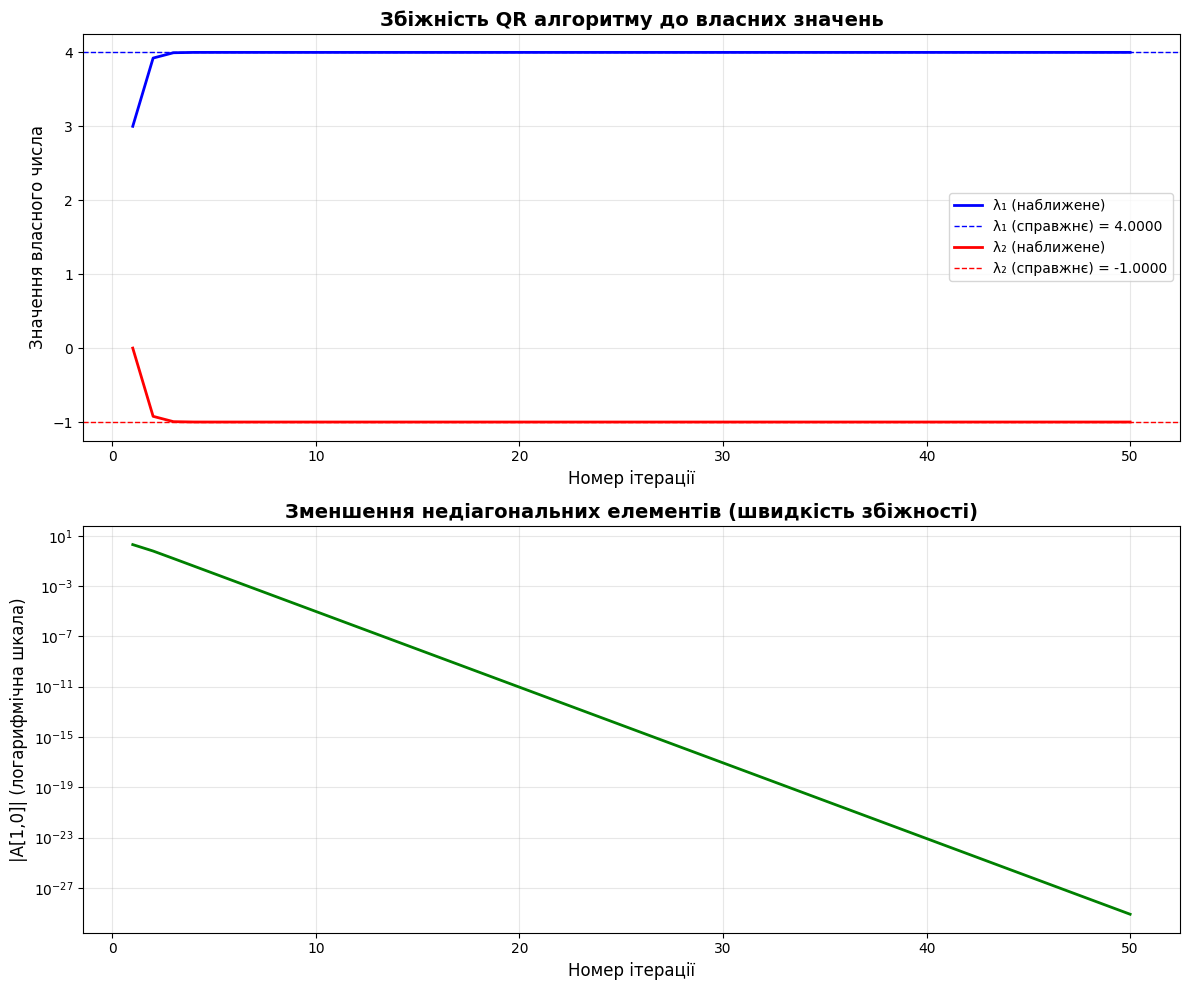


АНАЛІЗ ЗБІЖНОСТІ

Швидкість збіжності:
Ітерація 1:  |A[1,0]| = 2.000000
Ітерація 5:  |A[1,0]| = 9.765588e-03
Ітерація 10: |A[1,0]| = 9.536743e-06
Ітерація 20: |A[1,0]| = 9.094947e-12
Ітерація 50: |A[1,0]| = 7.888609e-30


In [36]:
import matplotlib.pyplot as plt

# Збираємо дані про збіжність
A_k = A.copy()
iterations = []
eigenvalue_1 = []
eigenvalue_2 = []
off_diagonal_vals = []

for i in range(1, 51):
    Q, R = qr(A_k)
    A_k = R @ Q

    iterations.append(i)
    eigenvalue_1.append(A_k[0, 0])
    eigenvalue_2.append(A_k[1, 1])
    off_diagonal_vals.append(np.abs(A_k[1, 0]))

# Створюємо графіки
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Графік 1: Збіжність власних значень
ax1.plot(iterations, eigenvalue_1, 'b-', linewidth=2, label='λ₁ (наближене)')
ax1.axhline(y=true_eigenvalues.max(), color='b', linestyle='--',
            linewidth=1, label=f'λ₁ (справжнє) = {true_eigenvalues.max():.4f}')

ax1.plot(iterations, eigenvalue_2, 'r-', linewidth=2, label='λ₂ (наближене)')
ax1.axhline(y=true_eigenvalues.min(), color='r', linestyle='--',
            linewidth=1, label=f'λ₂ (справжнє) = {true_eigenvalues.min():.4f}')

ax1.set_xlabel('Номер ітерації', fontsize=12)
ax1.set_ylabel('Значення власного числа', fontsize=12)
ax1.set_title('Збіжність QR алгоритму до власних значень', fontsize=14, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# Графік 2: Недіагональні елементи (показує швидкість збіжності)
ax2.semilogy(iterations, off_diagonal_vals, 'g-', linewidth=2)
ax2.set_xlabel('Номер ітерації', fontsize=12)
ax2.set_ylabel('|A[1,0]| (логарифмічна шкала)', fontsize=12)
ax2.set_title('Зменшення недіагональних елементів (швидкість збіжності)',
              fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3, which='both')

plt.tight_layout()
plt.show()

# Виводимо статистику
print("\n" + "="*60)
print("АНАЛІЗ ЗБІЖНОСТІ")
print("="*60)
print(f"\nШвидкість збіжності:")
print(f"Ітерація 1:  |A[1,0]| = {off_diagonal_vals[0]:.6f}")
print(f"Ітерація 5:  |A[1,0]| = {off_diagonal_vals[4]:.6e}")
print(f"Ітерація 10: |A[1,0]| = {off_diagonal_vals[9]:.6e}")
print(f"Ітерація 20: |A[1,0]| = {off_diagonal_vals[19]:.6e}")
print(f"Ітерація 50: |A[1,0]| = {off_diagonal_vals[49]:.6e}")

In [37]:
print("\n" + "="*60)
print("ДЕТАЛЬНИЙ РОЗБІР ПЕРШОЇ ІТЕРАЦІЇ")
print("="*60)

A_0 = A.copy()
print("\nКрок 1: Початкова матриця A₀")
print(A_0)

Q_1, R_1 = qr(A_0)
print("\nКрок 2: QR розклад: A₀ = Q₁ × R₁")
print("\nQ₁ (ортогональна):")
print(Q_1)
print("\nR₁ (верхньотрикутна):")
print(R_1)

# Перевірка: Q₁ × R₁ = A₀
print("\nПеревірка: Q₁ × R₁ = A₀?")
print(Q_1 @ R_1)
print(f"✓ Співпадає? {np.allclose(Q_1 @ R_1, A_0)}")

A_1 = R_1 @ Q_1
print("\nКрок 3: A₁ = R₁ × Q₁")
print(A_1)

print("\nВластивості:")
print(f"A₁[0,0] наближається до λ₁: {A_1[0,0]:.6f}")
print(f"A₁[1,1] наближається до λ₂: {A_1[1,1]:.6f}")
print(f"A₁[1,0] наближається до 0:  {A_1[1,0]:.6f}")


ДЕТАЛЬНИЙ РОЗБІР ПЕРШОЇ ІТЕРАЦІЇ

Крок 1: Початкова матриця A₀
[[0. 2.]
 [2. 3.]]

Крок 2: QR розклад: A₀ = Q₁ × R₁

Q₁ (ортогональна):
[[ 0. -1.]
 [-1.  0.]]

R₁ (верхньотрикутна):
[[-2. -3.]
 [ 0. -2.]]

Перевірка: Q₁ × R₁ = A₀?
[[0. 2.]
 [2. 3.]]
✓ Співпадає? True

Крок 3: A₁ = R₁ × Q₁
[[3. 2.]
 [2. 0.]]

Властивості:
A₁[0,0] наближається до λ₁: 3.000000
A₁[1,1] наближається до λ₂: 0.000000
A₁[1,0] наближається до 0:  2.000000


======= CHECK =========

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Ваша матриця
A = np.array([[0, 2],
              [2, 3]])

print("Матриця A:")
print(A)

# Знаходимо власні значення та вектори
eigenvalues, eigenvectors = np.linalg.eig(A)

print("\n" + "="*50)
print("Власні значення (λ):")
print(eigenvalues)
print("\nВласні вектори (кожен стовпець - це вектор):")
print(eigenvectors)

# Детальна перевірка
print("\n" + "="*50)
print("ПЕРЕВІРКА: A*v має дорівнювати λ*v")
print("="*50)

for i in range(len(eigenvalues)):
    v = eigenvectors[:, i]
    lambda_i = eigenvalues[i]

    print(f"\n--- Власний вектор №{i+1} ---")
    print(f"Вектор v{i+1} = {v}")
    print(f"Власне значення λ{i+1} = {lambda_i:.4f}")

    # Обчислюємо A*v
    Av = A @ v
    print(f"\nA * v{i+1} = {Av}")

    # Обчислюємо λ*v
    lambda_v = lambda_i * v
    print(f"λ{i+1} * v{i+1} = {lambda_v}")

    # Перевіряємо чи вони рівні
    is_equal = np.allclose(Av, lambda_v)
    print(f"✓ Співпадають? {is_equal}")

Матриця A:
[[0 2]
 [2 3]]

Власні значення (λ):
[-1.  4.]

Власні вектори (кожен стовпець - це вектор):
[[-0.89442719 -0.4472136 ]
 [ 0.4472136  -0.89442719]]

ПЕРЕВІРКА: A*v має дорівнювати λ*v

--- Власний вектор №1 ---
Вектор v1 = [-0.89442719  0.4472136 ]
Власне значення λ1 = -1.0000

A * v1 = [ 0.89442719 -0.4472136 ]
λ1 * v1 = [ 0.89442719 -0.4472136 ]
✓ Співпадають? True

--- Власний вектор №2 ---
Вектор v2 = [-0.4472136  -0.89442719]
Власне значення λ2 = 4.0000

A * v2 = [-1.78885438 -3.57770876]
λ2 * v2 = [-1.78885438 -3.57770876]
✓ Співпадають? True


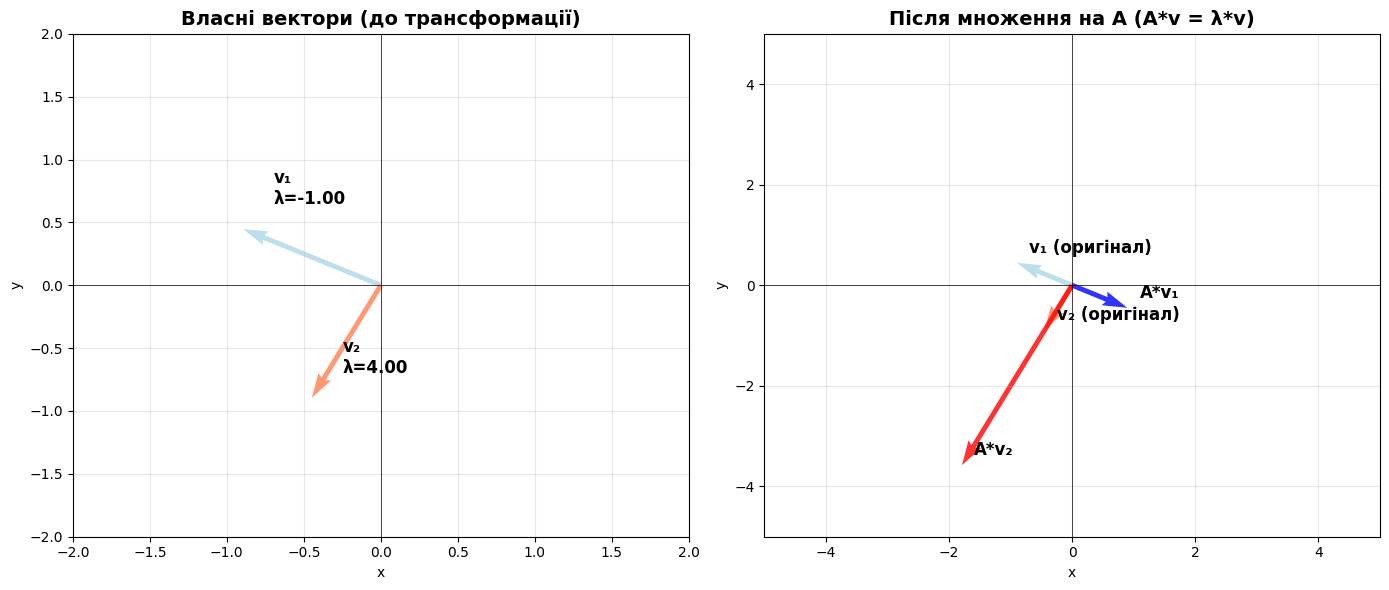

In [33]:
def plot_vectors(vectors, colors, labels=None):
    """Малює вектори з початком в (0,0)"""
    for i, vector in enumerate(vectors):
        plt.quiver(0, 0, vector[0], vector[1],
                   angles='xy', scale_units='xy', scale=1,
                   color=colors[i], width=0.008, alpha=0.8)
        if labels:
            # Додаємо підпис біля кінця вектора
            offset = 0.2
            plt.text(vector[0] + offset, vector[1] + offset,
                    labels[i], fontsize=12, fontweight='bold')

# Створюємо фігуру з двома графіками
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Графік 1: Оригінальні власні вектори
plt.sca(ax1)
v1 = eigenvectors[:, 0]
v2 = eigenvectors[:, 1]
plot_vectors([v1, v2],
             ['lightblue', 'coral'],
             [f'v₁\nλ={eigenvalues[0]:.2f}', f'v₂\nλ={eigenvalues[1]:.2f}'])
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='k', linewidth=0.5)
plt.axvline(x=0, color='k', linewidth=0.5)
plt.title('Власні вектори (до трансформації)', fontsize=14, fontweight='bold')
plt.xlabel('x')
plt.ylabel('y')

# Графік 2: Після множення на A
plt.sca(ax2)
Av1 = A @ v1
Av2 = A @ v2
plot_vectors([v1, v2, Av1, Av2],
             ['lightblue', 'coral', 'blue', 'red'],
             ['v₁ (оригінал)', 'v₂ (оригінал)', 'A*v₁', 'A*v₂'])
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='k', linewidth=0.5)
plt.axvline(x=0, color='k', linewidth=0.5)
plt.title('Після множення на A (A*v = λ*v)', fontsize=14, fontweight='bold')
plt.xlabel('x')
plt.ylabel('y')

plt.tight_layout()
plt.show()